In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import husl
from random import shuffle
from legendgram import legendgram
import mapclassify
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import ListedColormap

from tqdm import tqdm

In [2]:
clusters = pd.read_csv('/Users/martin/Dropbox/Academia/Data/Geo/Amsterdam/clustering/200309_clusters_complete_n30.csv', index_col=0)

In [3]:
gdf = gpd.read_file('/Users/martin/Dropbox/Academia/Data/Geo/Amsterdam/clustering/geometry.gpkg',
                   layer='buildings')

In [4]:
gdf = gdf.merge(clusters, on='uID', how='left')
gdf.shape

(252385, 6)

In [5]:
gdf = gdf.dropna()
print(len(gdf.cluster.unique()))
gdf.shape

30


(252310, 6)

In [6]:
def north_arrow(f, ax, rotation=0, loc=2, legend_size=(.1,.1), frameon=False, thick=.1, outline=3, edgecolor='k', facecolor='k'):
    from legendgram.util import make_location
    from matplotlib.transforms import Affine2D
    
    arrpos = make_location(ax, loc, legend_size=legend_size)
    arrax = f.add_axes(arrpos)

    circle = plt.Circle((0, 0), radius=1, edgecolor=edgecolor, facecolor='w', linewidth=outline)
    arrax.add_patch(circle)

    rectangle = plt.Rectangle((-0.05, 0), thick, 1, facecolor=facecolor)
    t = Affine2D().rotate_deg(rotation) + arrax.transData
    rectangle.set_transform(t)
    arrax.add_patch(rectangle)
    arrax.axis('scaled')
    arrax.set_frame_on(frameon)
    arrax.get_yaxis().set_visible(False)
    arrax.get_xaxis().set_visible(False)
    return arrax

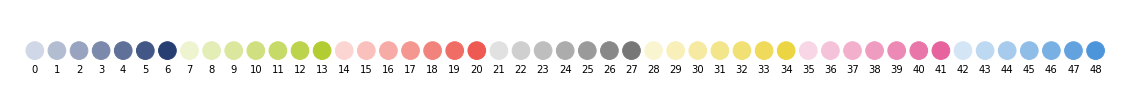

In [8]:
cols = []
colors = [(257, 71, 27), (98, 93, 78), (14, 79, 58), (26, 0, 50), (75, 90, 85), (347, 72, 60), (246, 79, 60)]

for col in colors:
    pal = sns.light_palette(col, input="husl", n_colors=8)
    for rgb in pal[1:]:
        cols.append(rgb)
fig, ax = plt.subplots(figsize=(20, 5))
for i, c in enumerate(cols):
    ax.add_artist(plt.Circle((i, 0), 0.4, color=c))  
    plt.text(i, -1, i, horizontalalignment='center')
    ax.set_axis_off()
    ax.set_aspect(1)
    plt.xlim(-1.25,49.25)
    plt.ylim(-2,2)

In [11]:
symbology = {0: cols[1],
             1: cols[19],
             2: cols[48],
             3: cols[33],
             4: cols[3],
             5: cols[43],
             6: cols[45],
             7: cols[41],
             8: cols[26],
             9: cols[20],
             10: cols[47],
             11: cols[4],
             12: cols[39],
             13: cols[5],
             14: cols[42],
             15: cols[32],
             16: cols[25],
             17: cols[11],
             18: cols[2],
             19: cols[38],
             20: cols[40],
             21: cols[10],
             22: cols[46],
             23: cols[27],
             24: cols[18],
             25: cols[12],
             26: cols[34],
             27: cols[13],
             28: cols[44],
             29: cols[6]
            }

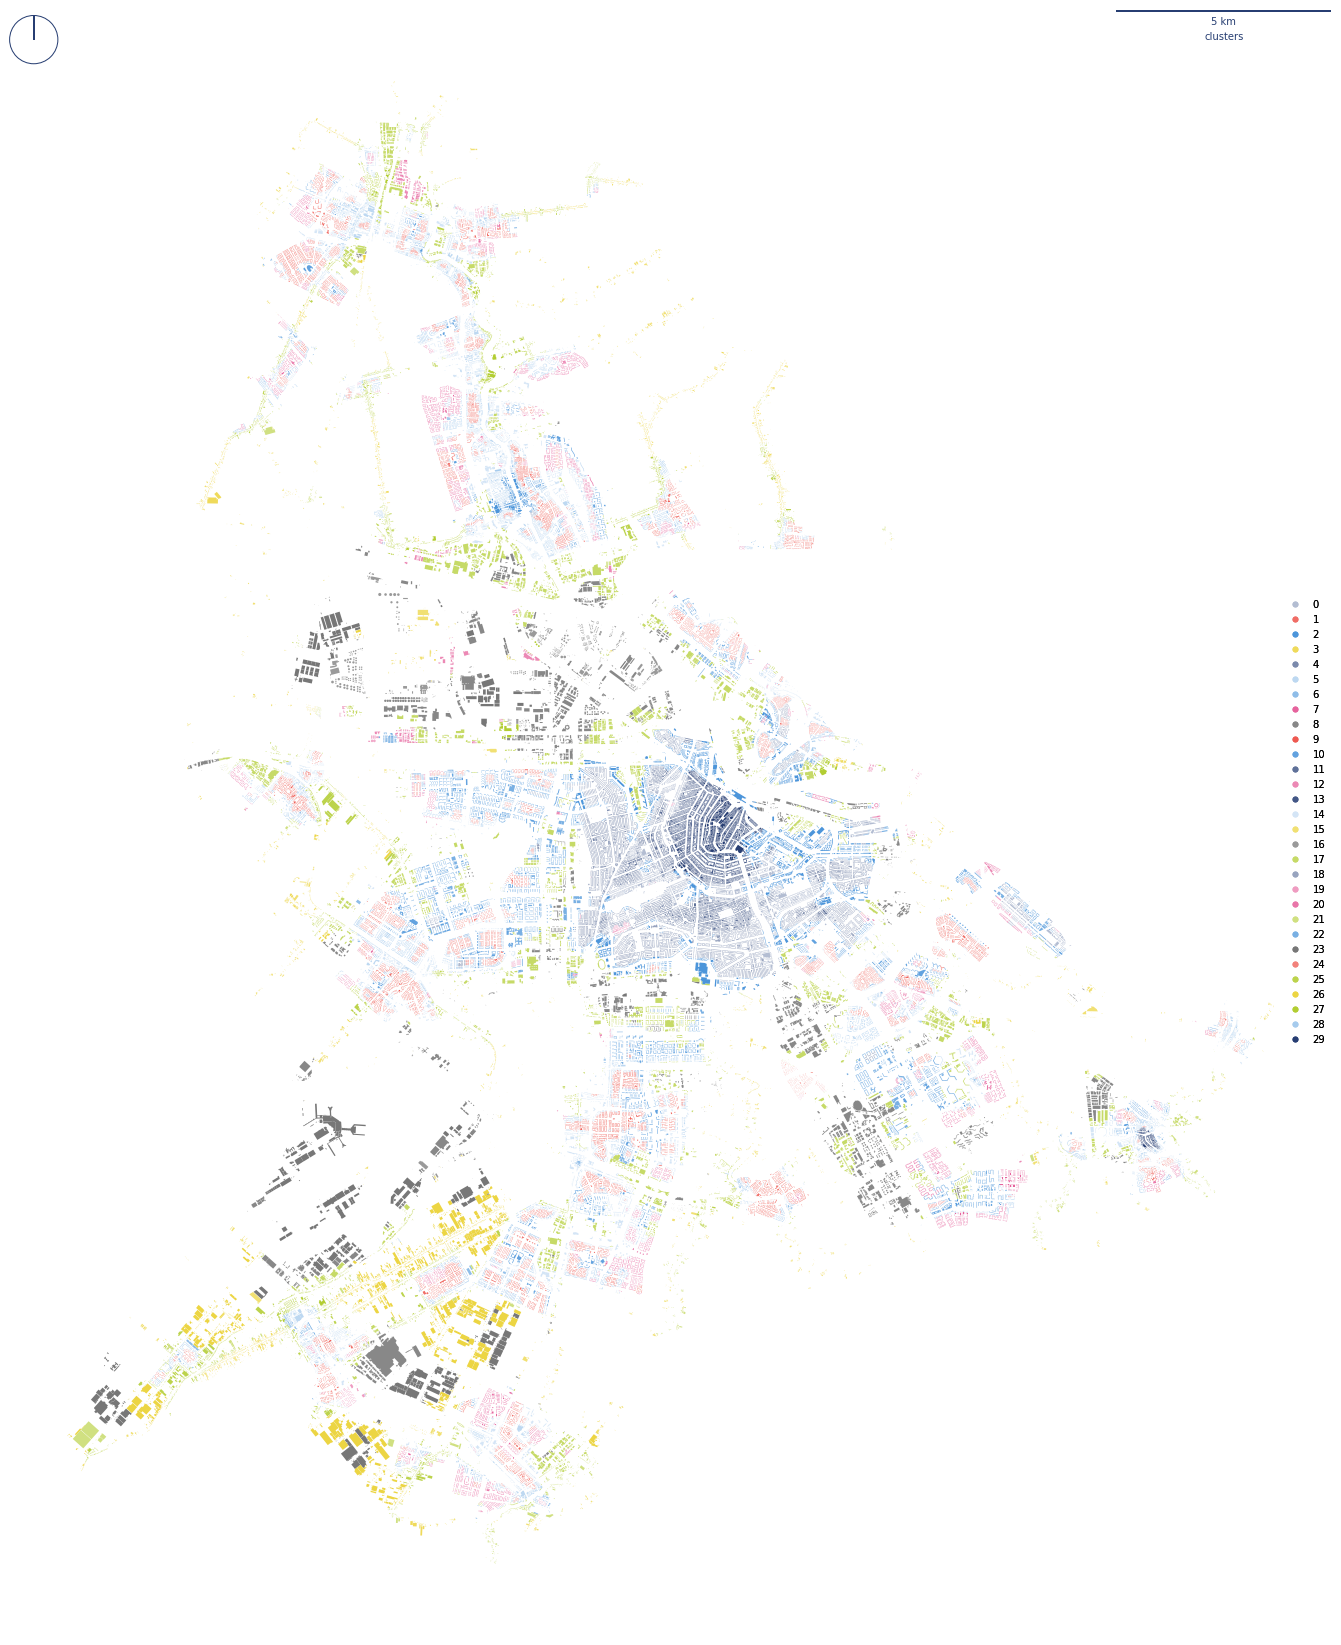

In [12]:
# settings
gdf = gdf
label = 'clusters'
color = (257, 71, 27)  # here for arrow, title, scalebar


# plotting
c = husl.husl_to_hex(*color)

ax = gdf.plot(color=gdf['cluster'].map(symbology), figsize=(30, 30))
ax.set_axis_off()


# add scalebar
scalebar = ScaleBar(dx=1,
                    color=c,
                    location=1,
                    height_fraction=0.001,
                    #fixed_value=1000,
                    label=label,
                    label_loc='bottom'
                    )
ax.add_artist(scalebar)

# add arrow
north_arrow(plt.gcf(), ax, 0, legend_size=(.04,.04), outline=1, edgecolor=c, facecolor=c)

# add manual legend
from matplotlib.lines import Line2D
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=color) for color in symbology.values()]
leg_points = ax.legend(custom_points, symbology.keys(), loc='center right', frameon=False)
ax.add_artist(leg_points)
for ext in ['pdf', 'png']:
    plt.savefig('figures/hierarchical/AMS_clusters_hierarchical.' + ext, bbox_inches='tight')

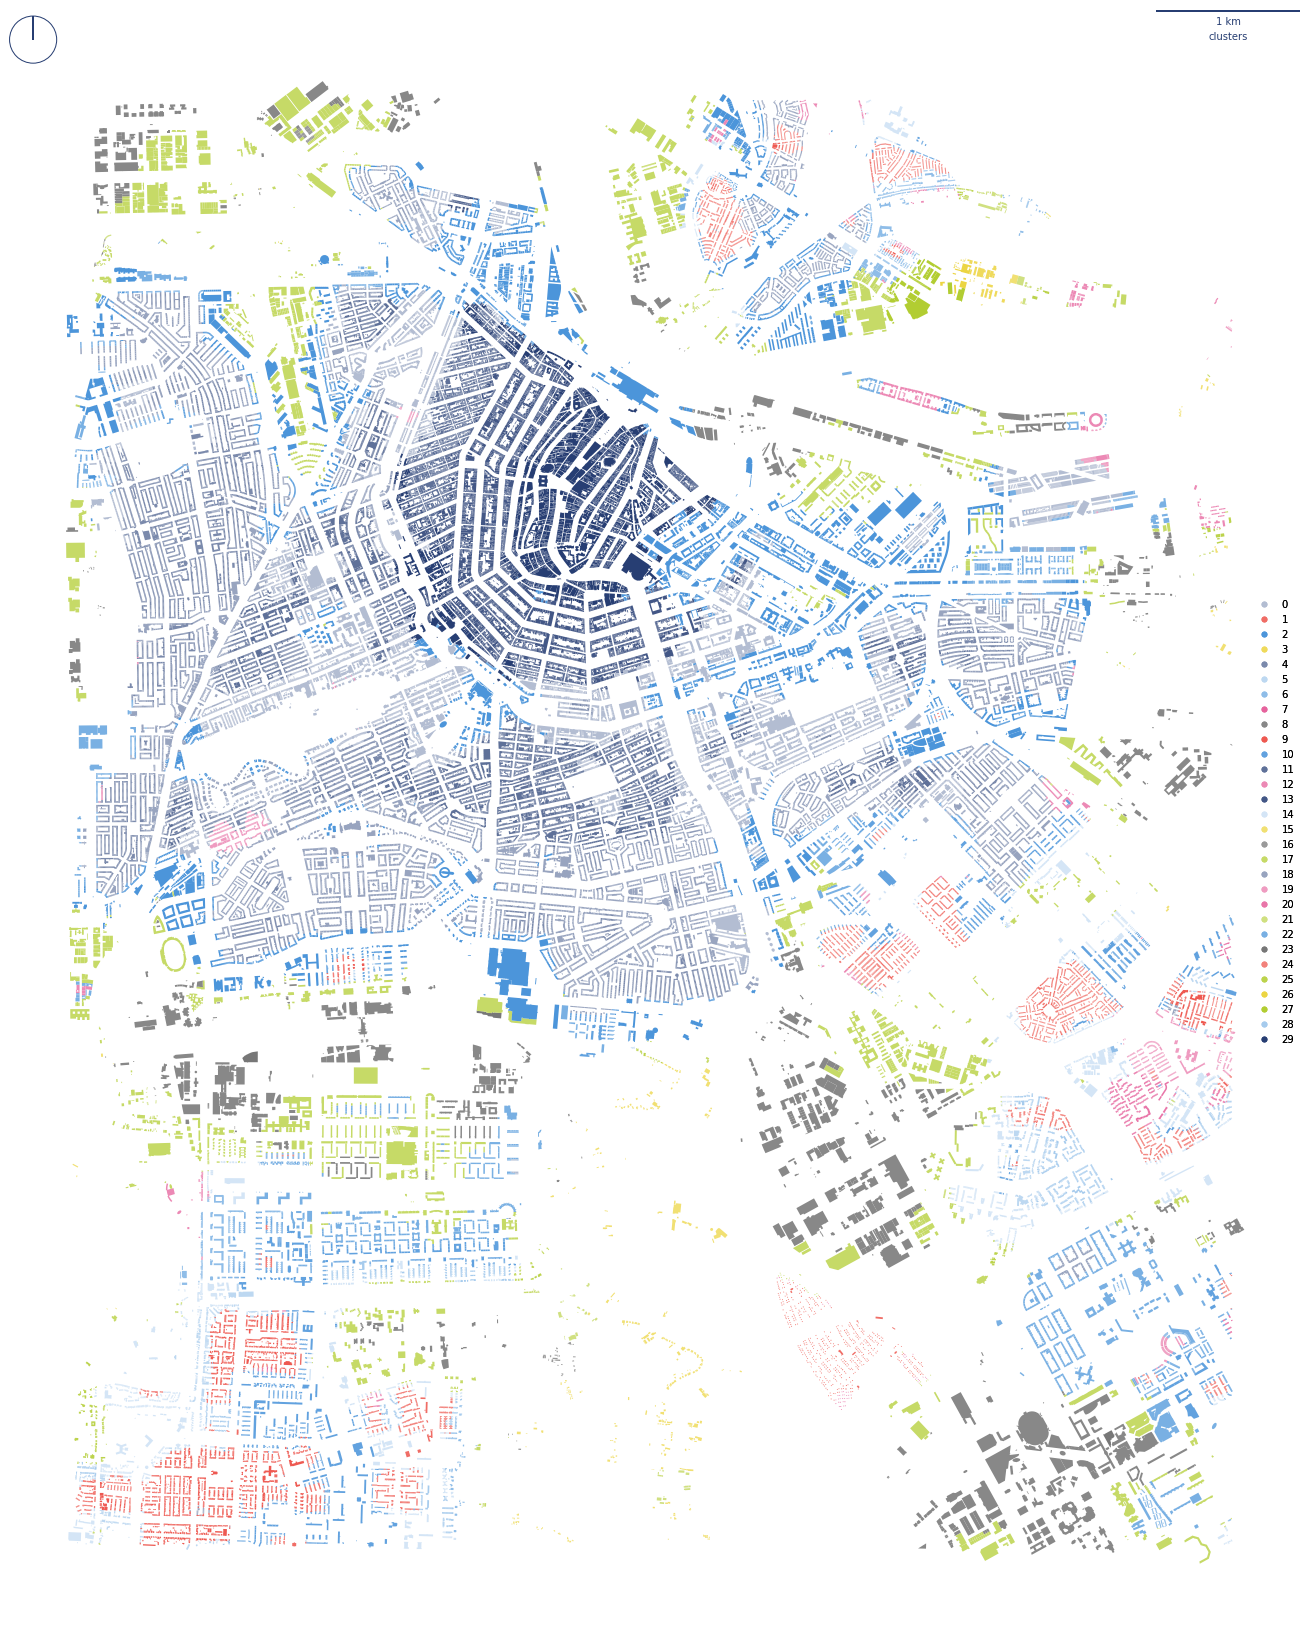

In [13]:
# settings
gdf_pl = gdf.cx[118000:126000, 480000:490000]
label = 'clusters'
color = (257, 71, 27)  # here for arrow, title, scalebar


# plotting
c = husl.husl_to_hex(*color)

ax = gdf_pl.plot(color=gdf_pl['cluster'].map(symbology), figsize=(30, 30))
ax.set_axis_off()


# add scalebar
scalebar = ScaleBar(dx=1,
                    color=c,
                    location=1,
                    height_fraction=0.001,
                    #fixed_value=1000,
                    label=label,
                    label_loc='bottom'
                    )
ax.add_artist(scalebar)

# add arrow
north_arrow(plt.gcf(), ax, 0, legend_size=(.04,.04), outline=1, edgecolor=c, facecolor=c)

# add manual legend
from matplotlib.lines import Line2D
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=color) for color in symbology.values()]
leg_points = ax.legend(custom_points, symbology.keys(), loc='center right', frameon=False)
ax.add_artist(leg_points)
for ext in ['pdf', 'png']:
    plt.savefig('figures/hierarchical/AMS_clusters_hierarchical_detail.' + ext, bbox_inches='tight')

In [14]:
# settings
gdf = gdf
color = (257, 71, 27)  # here for arrow, title, scalebar


# plotting
c = husl.husl_to_hex(*color)

combinations = [[0, 18, 4, 11, 13, 29], [2, 10, 22, 6, 28, 5, 14],
               [24, 1, 9], [12, 7, 20], [24, 1, 9, 19, 12, 7, 20],
               [24, 1, 9, 19, 12, 7, 20, 2, 10, 22, 6, 28, 5, 14],
               [24, 1, 9, 19, 12, 7, 20, 2, 10, 22, 6, 28, 5, 14,
                0, 18, 4, 11, 13, 29], [23, 8, 16], [26, 3 ,15],
               [21, 17, 25, 27], [23, 8, 16, 26, 3, 15, 21, 17, 25, 27]]

for i, com in tqdm(enumerate(combinations), total=len(combinations)):
    label = 'branch (' + str(com)[1:-1] + ')'


    df = gdf[gdf.cluster.isin(com)]

    ax = df.plot(color=df['cluster'].map(symbology), figsize=(30, 30), zorder=1)
    gdf[~gdf.cluster.isin(com)].plot(ax=ax, color='whitesmoke', zorder=0)
    ax.set_axis_off()


    # add scalebar
    scalebar = ScaleBar(dx=1,
                        color=c,
                        location=1,
                        height_fraction=0.001,
                        #fixed_value=1000,
                        label=label,
                        label_loc='bottom'
                        )
    ax.add_artist(scalebar)

    # add arrow
    north_arrow(plt.gcf(), ax, 0, legend_size=(.04,.04), outline=1, edgecolor=c, facecolor=c)

    for ext in ['pdf', 'png']:
        plt.savefig('figures/hierarchical/AMS_hierarchical_branch_' + str(i) + '.' + ext, bbox_inches='tight')
    plt.close()

100%|██████████| 11/11 [24:28<00:00, 133.48s/it]
